# Data exploration

Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns

In [ ]:
df1 = pd.read_csv('./Partitioned LCL Data/Small LCL Data/LCL-June2015v2_105.csv')
for i in range(106,120):
   df2 = pd.read_csv('./Partitioned LCL Data/Small LCL Data/LCL-June2015v2_'+str(i)+'.csv') 
  
   df1=pd.concat([df1, df2], join="inner")
  
df1

In [ ]:
df1=df1.reset_index()
df1.shape()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC004458,Std,2012-08-30 14:30:00.0000000,1.834
1,MAC004458,Std,2012-08-30 15:00:00.0000000,1.428
2,MAC004458,Std,2012-08-30 15:30:00.0000000,0.653
3,MAC004458,Std,2012-08-30 16:00:00.0000000,0.49
4,MAC004458,Std,2012-08-30 16:30:00.0000000,0.594
...,...,...,...,...
999995,MAC005007,Std,2012-07-09 00:00:00.0000000,0.048
999996,MAC005007,Std,2012-07-09 00:30:00.0000000,0.044
999997,MAC005007,Std,2012-07-09 01:00:00.0000000,0.039
999998,MAC005007,Std,2012-07-09 01:30:00.0000000,0.03


In [ ]:
print('on a',len(df1['LCLid'].unique()),'Compteurs')

448

In [ ]:
(df1[df1['LCLid']=='MAC004554']['DateTime']=='2012-07-19 00:00:00.0000000').value_counts()

False    38340
True         2
Name: DateTime, dtype: int64

In [ ]:
(df1[df1['LCLid']=='MAC004554']['DateTime']=='2012-07-19 00:00:00.0000000')

209862    False
209863    False
209864    False
209865    False
209866    False
          ...  
248199    False
248200    False
248201    False
248202    False
248203    False
Name: DateTime, Length: 38342, dtype: bool

In [ ]:
df1.value_counts().head(10)

LCLid      stdorToU  DateTime                     KWH/hh (per half hour) 
MAC005004  Std       2012-04-17 00:00:00.0000000   0.041                     2
MAC004458  Std       2013-04-24 00:00:00.0000000   0.524                     2
MAC004947  Std       2012-10-20 00:00:00.0000000   0.443                     2
MAC004997  Std       2012-02-15 00:00:00.0000000   0.371                     2
MAC004775  Std       2013-04-24 00:00:00.0000000   0.054                     2
MAC004637  Std       2013-07-26 00:00:00.0000000   0.281                     2
MAC004649  Std       2013-02-21 00:00:00.0000000   0.163                     2
MAC004584  Std       2013-06-25 00:00:00.0000000   0.026                     2
MAC004614  Std       2013-12-28 00:00:00.0000000   0.339                     2
MAC004834  Std       2012-05-18 00:00:00.0000000   0.045                     2
dtype: int64

In [ ]:
#on va commencer par supprimer les lignes dupliquées
df1.drop_duplicates(keep='first', inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14989741 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   LCLid                    object
 1   stdorToU                 object
 2   DateTime                 object
 3   KWH/hh (per half hour)   object
dtypes: object(4)
memory usage: 571.8+ MB


In [ ]:
#On a passé de 15000000 lignes a 14989741 lignes.

In [ ]:
df1['stdorToU'].value_counts() #cette valeur est la meme pour toute la dataset donc on peut la supprimer 

Std    14989741
Name: stdorToU, dtype: int64

In [ ]:
df1['DateTime'].value_counts()

2012-10-25 18:00:00.0000000    447
2012-11-16 03:00:00.0000000    447
2012-11-15 20:30:00.0000000    447
2012-11-15 21:00:00.0000000    447
2012-11-15 21:30:00.0000000    447
                              ... 
2011-12-16 20:00:00.0000000      1
2011-12-16 20:30:00.0000000      1
2011-12-16 21:00:00.0000000      1
2011-12-16 21:30:00.0000000      1
2011-12-16 18:00:00.0000000      1
Name: DateTime, Length: 38686, dtype: int64

In [ ]:
df1[df1['DateTime']=='2012-10-25 20:00:00.0000000']

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
2701,MAC004458,Std,2012-10-25 20:00:00.0000000,1.086
41338,MAC004459,Std,2012-10-25 20:00:00.0000000,0.475
79924,MAC004460,Std,2012-10-25 20:00:00.0000000,0.183
118524,MAC004461,Std,2012-10-25 20:00:00.0000000,0.125
157125,MAC004462,Std,2012-10-25 20:00:00.0000000,0.236
...,...,...,...,...
824697,MAC005001,Std,2012-10-25 20:00:00.0000000,0.346
858860,MAC005002,Std,2012-10-25 20:00:00.0000000,0.085
895476,MAC005003,Std,2012-10-25 20:00:00.0000000,0.074
932060,MAC005004,Std,2012-10-25 20:00:00.0000000,0.09


In [ ]:
#pour une meme datetime on a plusieurs valeurs de differents compteur, comme par exemple le datetime pour 2012-10-25 20:00:00.0000000
#est repeté 366 fois 
 

In [ ]:
#Nombre de colonne pertinente est 3
df1.drop('stdorToU', inplace=True, axis=1)

In [ ]:
df1.isna()['KWH/hh (per half hour) '].value_counts()

False    14989741
Name: KWH/hh (per half hour) , dtype: int64

In [ ]:
df1.isna()['DateTime'].value_counts()

False    14989741
Name: DateTime, dtype: int64

In [ ]:
df1.isna()['LCLid'].value_counts()

False    14989741
Name: LCLid, dtype: int64

<AxesSubplot:>

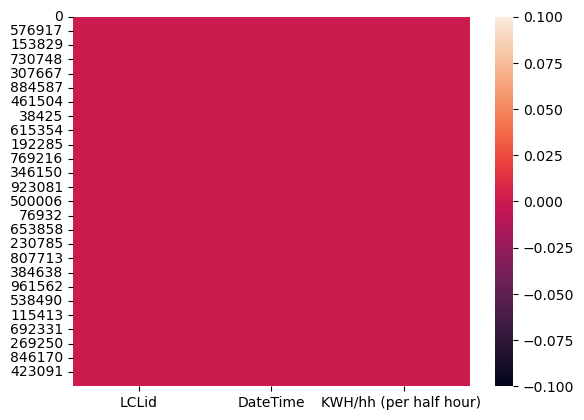

In [ ]:
#les valeurs manquantes dans la dataset

sns.heatmap(df1.isna())

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1

,LCLid,DateTime,KWH/hh (per half hour)
0,MAC004458,2012-08-30 14:30:00.0000000,1.834
1,MAC004458,2012-08-30 15:00:00.0000000,1.428
2,MAC004458,2012-08-30 15:30:00.0000000,0.653
3,MAC004458,2012-08-30 16:00:00.0000000,0.49
4,MAC004458,2012-08-30 16:30:00.0000000,0.594
...,...,...,...
999995,MAC005007,2012-07-09 00:00:00.0000000,0.048
999996,MAC005007,2012-07-09 00:30:00.0000000,0.044
999997,MAC005007,2012-07-09 01:00:00.0000000,0.039
999998,MAC005007,2012-07-09 01:30:00.0000000,0.03


In [ ]:
#On n'a pas de valeurs nan dans la dataset

In [ ]:
#s=0
#for i in df1['KWH/hh (per half hour) '] :
    #print(float(i))
    #s=float(i)+s

In [ ]:
(df1['KWH/hh (per half hour) ']=='Null').value_counts()

False    14989295
True          446
Name: KWH/hh (per half hour) , dtype: int64

In [ ]:
#on va supprimer ces lignes 
indice=df1[df1['KWH/hh (per half hour) ']=='Null'].index

In [ ]:
len(indice)

446

In [ ]:
df1[df1['KWH/hh (per half hour) ']=='Null']

,LCLid,DateTime,KWH/hh (per half hour)
5285,MAC004458,2012-12-18 15:13:56.0000000,Null
43922,MAC004459,2012-12-18 15:13:56.0000000,Null
82508,MAC004460,2012-12-18 15:13:56.0000000,Null
121108,MAC004461,2012-12-18 15:13:56.0000000,Null
159709,MAC004462,2012-12-18 15:13:56.0000000,Null
...,...,...,...
827281,MAC005001,2012-12-18 15:14:29.0000000,Null
861444,MAC005002,2012-12-18 15:14:29.0000000,Null
898060,MAC005003,2012-12-18 15:14:30.0000000,Null
934644,MAC005004,2012-12-18 15:14:30.0000000,Null


In [ ]:
df1.drop(indice , inplace=True)

In [ ]:
df1['KWH/hh (per half hour) '].describe()

count     14983053
unique        5632
top             0 
freq        210936
Name: KWH/hh (per half hour) , dtype: object

In [ ]:
df1['KWH/hh (per half hour) ']=pd. to_numeric(df1['KWH/hh (per half hour) '])

In [ ]:
df1['KWH/hh (per half hour) '].describe()

count    1.498305e+07
mean     2.129721e-01
std      3.203826e-01
min      0.000000e+00
25%      5.600000e-02
50%      1.120000e-01
75%      2.360000e-01
max      9.257000e+00
Name: KWH/hh (per half hour) , dtype: float64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importation du dataset aprés le netoyage de doublons et des valeurs manquantes.

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/Smart_grid/Data_clean.csv')

In [ ]:
df1

,LCLid,DateTime,KWH/hh (per half hour)
0,MAC004458,2012-08-30 14:30:00.0000000,1.834
1,MAC004458,2012-08-30 15:00:00.0000000,1.428
2,MAC004458,2012-08-30 15:30:00.0000000,0.653
3,MAC004458,2012-08-30 16:00:00.0000000,0.490
4,MAC004458,2012-08-30 16:30:00.0000000,0.594
...,...,...,...
14983048,MAC005007,2012-07-09 00:00:00.0000000,0.048
14983049,MAC005007,2012-07-09 00:30:00.0000000,0.044
14983050,MAC005007,2012-07-09 01:00:00.0000000,0.039
14983051,MAC005007,2012-07-09 01:30:00.0000000,0.030


Pour rendre la partie analyse plus facile, on va diviser la colonne datetime en 5 colonnes ( year, month,day,hour et minute)

In [ ]:
#On commence par convertir les valeurs de la colonne datetime de str to datetime objet pour les manipuler facilement ultérieurement(cette cellule peut prendre jusqu'à 3 min)
from datetime import datetime
datetim=[]
for i in df1['DateTime']:
 
 time_data = i
 time_data=time_data.split('.')
 time_data = time_data[0].replace("-", "/")
 time_data=time_data.strip()
 format_data = "%Y/%m/%d %H:%M:%S"
 datetim.append(datetime.strptime(time_data, format_data))

In [ ]:
#on remplace la colonne datetime par une autre colonne de type Datetime
df1['DateTime']=datetim

In [ ]:
#On crée les colonnes year,month,day,hour et minutes et on assigne a chaque colonne sa valeur convenable
Year=[]
Month=[]
Day=[]
Hour=[]
Minutes=[]
for i in df1['DateTime']:
    Year.append(i.year)
    Month.append(i.month)
    Day.append(i.day)
    Hour.append(i.hour)
    Minutes.append(i.minute)
    

In [ ]:
#On ajoute les colonnes au dataframe df1
df1['Year']=Year
df1['Month']=Month
df1['Day']=Day
df1['Hour']=Hour
df1['Minute']=Minutes


In [ ]:
df1=df1.drop('DateTime',axis=1)

In [ ]:
#Pour eviter de perdre le temps chaque fois pour avoir ce dataframe, on va l'enregistrer dans un fichier Data_With_Date sous forme csv
df1.to_csv('/content/drive/MyDrive/Smart_grid/Data_with_date.csv',index=False)
